In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

In [4]:
detect_df = pd.read_csv("detect_Data.csv")
class_df = pd.read_csv("class_Data.csv")

In [5]:
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [6]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [8]:
class_df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Line C Fault')

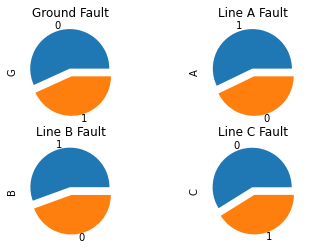

In [17]:
ax = plt.subplot(2,2,1)
ax=class_df['G'].value_counts().plot.pie(explode=[0.1, 0.1]);
plt.title("Ground Fault")

ax = plt.subplot(2,2,2)
ax=class_df['A'].value_counts().plot.pie(explode=[0.1, 0.1]);
plt.title("Line A Fault")

ax = plt.subplot(2,2,3)
ax=class_df['B'].value_counts().plot.pie(explode=[0.1, 0.1]);
plt.title("Line B Fault")

ax = plt.subplot(2,2,4)
ax=class_df['C'].value_counts().plot.pie(explode=[0.1, 0.1]);
plt.title("Line C Fault")

In [26]:
class_df['Fault'] = class_df['G'].astype('str') + class_df['C'].astype('str') + class_df['B'].astype('str') + class_df['A'].astype('str')

In [27]:
class_df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


In [28]:
#
#Fault type reference ke liye
#[0 0 0 0] - No Fault
#[1 0 0 1] - LG fault (Between Phase A and Gnd)
#[0 0 1 1] - LL fault (Between Phase A and Phase B)
#[1 0 1 1] - LLG Fault (Between Phases A,B and ground)
#[0 1 1 1] - LLL Fault(Between all three phases)
#[1 1 1 1] - LLLG fault( Three phase symmetrical fault)


In [31]:
import warnings
warnings.filterwarnings('ignore')

class_df['Fault'][class_df['Fault'] == '0000' ] = 'No Fault'
class_df['Fault'][class_df['Fault'] == '1001' ] = 'LG Fault'
class_df['Fault'][class_df['Fault'] == '0110' ] = 'LL Fault'
class_df['Fault'][class_df['Fault'] == '1011' ] = 'LLG Fault'
class_df['Fault'][class_df['Fault'] == '0111' ] = 'LLL Fault'
class_df['Fault'][class_df['Fault'] == '1111' ] = 'LLLG Fault'

In [32]:
class_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG Fault


Text(0.5, 1.0, 'Distribution in Type of Faults')

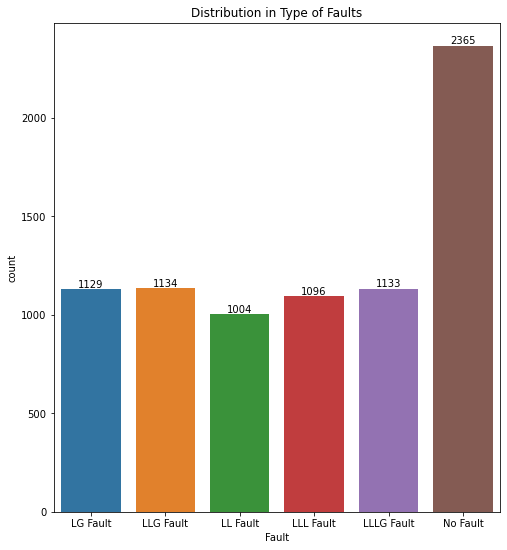

In [37]:
ax = plt.figure(figsize = (8,9))
ax = sns.countplot(x='Fault', data=class_df)
ax.bar_label(ax.containers[0])
plt.title("Distribution in Type of Faults")



Text(0.5, 0, 'Vc')

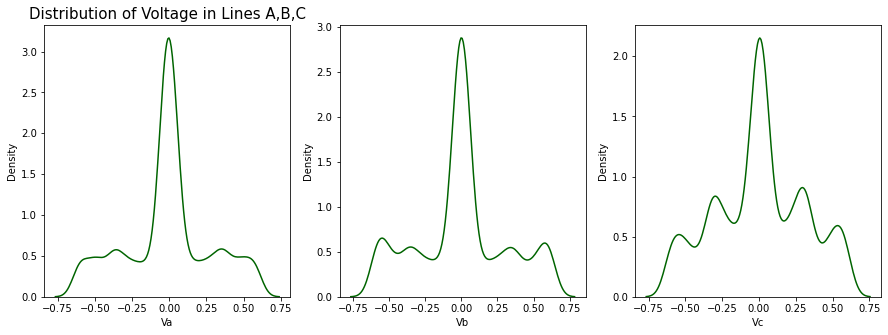

In [48]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.kdeplot(class_df['Va'],color='darkgreen')
plt.xlabel('Va')
plt.title("Distribution of Voltage in Lines A,B,C", fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(class_df['Vb'],color='darkgreen')
plt.xlabel('Vb')

plt.subplot(1,3,3)
sns.kdeplot(class_df['Vc'],color='darkgreen')
plt.xlabel('Vc')


Text(0.5, 0, 'Ic')

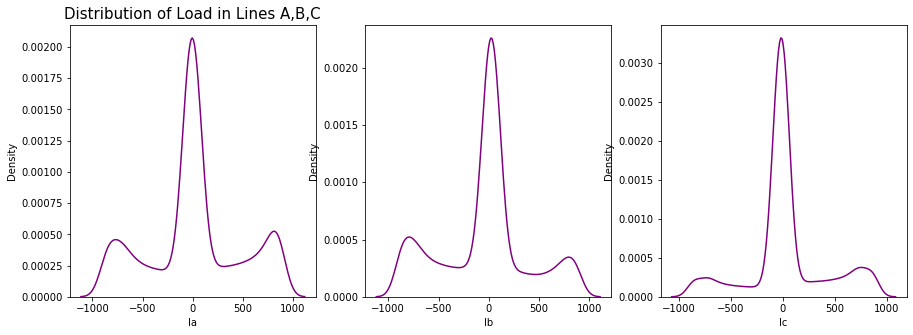

In [50]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.kdeplot(class_df['Ia'],color='purple')
plt.xlabel('Ia')
plt.title("Distribution of Load in Lines A,B,C", fontsize = 15)

plt.subplot(1,3,2)
sns.kdeplot(class_df['Ib'],color='purple')
plt.xlabel('Ib')

plt.subplot(1,3,3)
sns.kdeplot(class_df['Ic'],color='purple')
plt.xlabel('Ic')



Text(0.5, 1.0, 'Load on all Lines')

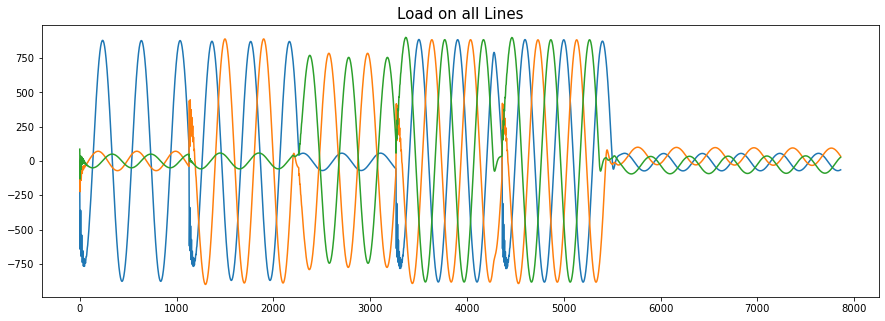

In [57]:
plt.figure(figsize = (15,5))
plt.plot(class_df["Ia"])
plt.plot(class_df["Ib"])
plt.plot(class_df["Ic"])
plt.title("Load on all Lines", fontsize = 15)

Text(0.5, 1.0, 'Voltage on all Lines')

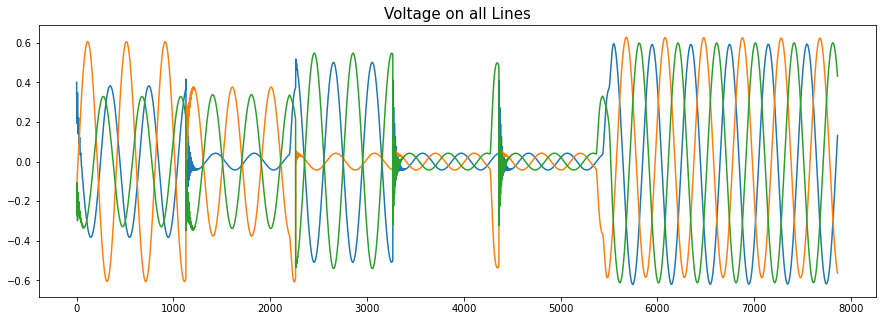

In [58]:
plt.figure(figsize = (15,5))
plt.plot(class_df["Va"])
plt.plot(class_df["Vb"])
plt.plot(class_df["Vc"])
plt.title("Voltage on all Lines", fontsize = 15)

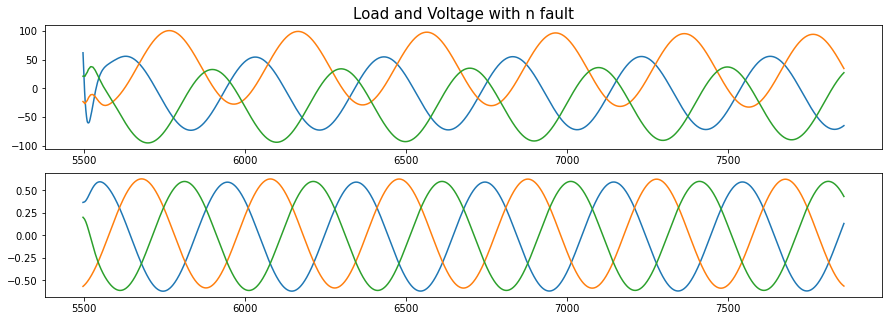

In [61]:
nofault = class_df[class_df['Fault'] == 'No Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(nofault["Ia"])
plt.plot(nofault["Ib"])
plt.plot(nofault["Ic"])
plt.title("Load and Voltage with n fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(nofault["Va"])
plt.plot(nofault["Vb"])
plt.plot(nofault["Vc"])

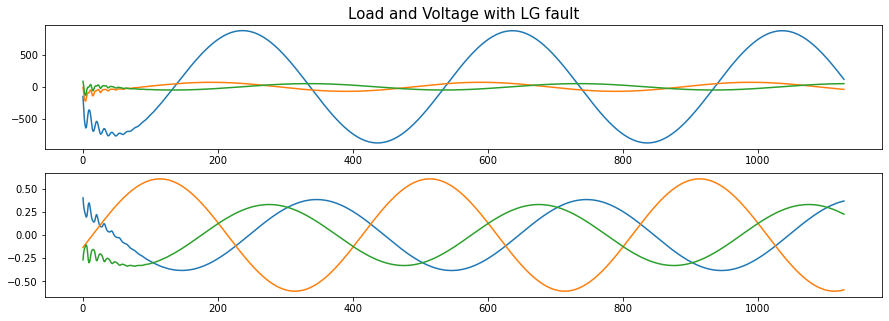

In [62]:
lg = class_df[class_df['Fault'] == 'LG Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(lg["Ia"])
plt.plot(lg["Ib"])
plt.plot(lg["Ic"])
plt.title("Load and Voltage with LG fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(lg["Va"])
plt.plot(lg["Vb"])
plt.plot(lg["Vc"])

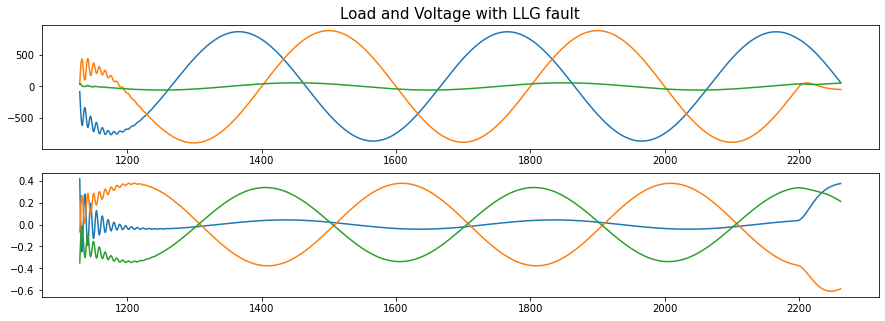

In [63]:
llg = class_df[class_df['Fault'] == 'LLG Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(llg["Ia"])
plt.plot(llg["Ib"])
plt.plot(llg["Ic"])
plt.title("Load and Voltage with LLG fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(llg["Va"])
plt.plot(llg["Vb"])
plt.plot(llg["Vc"])

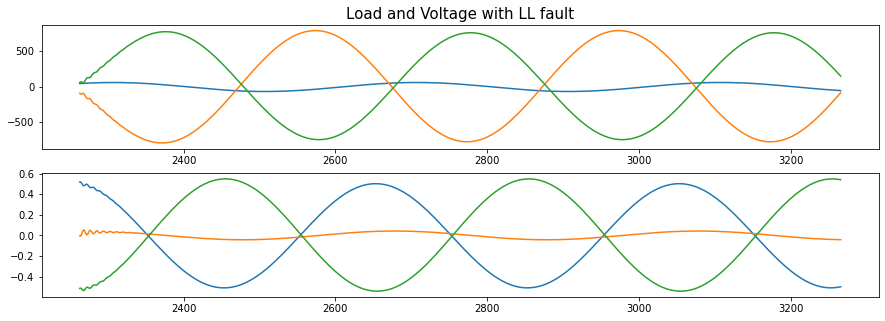

In [64]:
ll = class_df[class_df['Fault'] == 'LL Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(ll["Ia"])
plt.plot(ll["Ib"])
plt.plot(ll["Ic"])
plt.title("Load and Voltage with LL fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(ll["Va"])
plt.plot(ll["Vb"])
plt.plot(ll["Vc"])

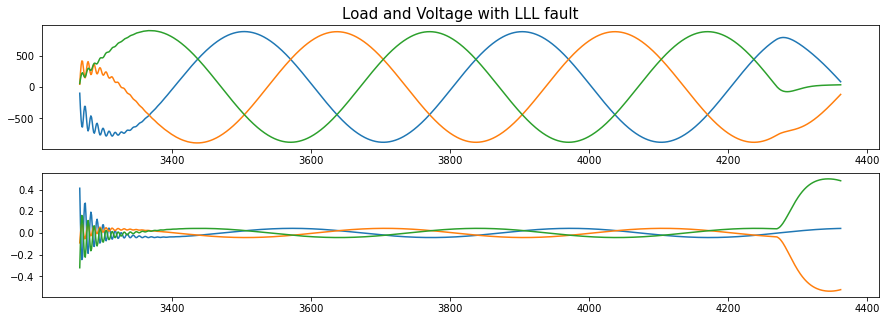

In [65]:
lll = class_df[class_df['Fault'] == 'LLL Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(lll["Ia"])
plt.plot(lll["Ib"])
plt.plot(lll["Ic"])
plt.title("Load and Voltage with LLL fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(lll["Va"])
plt.plot(lll["Vb"])
plt.plot(lll["Vc"])

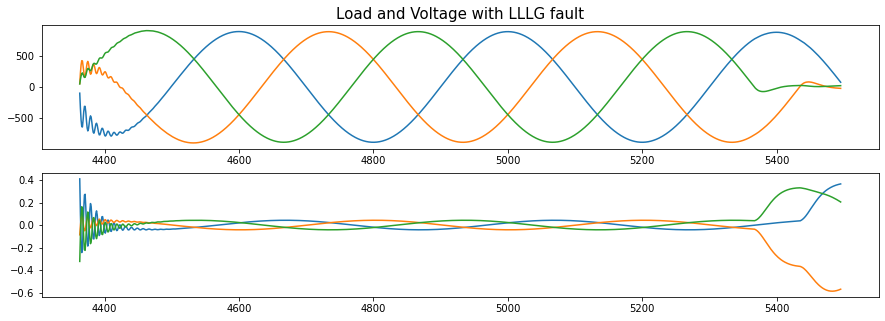

In [66]:
lllg = class_df[class_df['Fault'] == 'LLLG Fault' ]

plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
plt.plot(lllg["Ia"])
plt.plot(lllg["Ib"])
plt.plot(lllg["Ic"])
plt.title("Load and Voltage with LLLG fault", fontsize = 15)

plt.subplot(2,1,2)
plt.plot(lllg["Va"])
plt.plot(lllg["Vb"])
plt.plot(lllg["Vc"])

In [67]:
##Processing Data

In [69]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
class_df['Fault'] = encoder.fit_transform(class_df['Fault'])
class_df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,0
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,0
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,0
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,0
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,0
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,5
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,5
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,5
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,5


In [71]:
X = class_df.drop(['Fault','G','C','B','A'],axis=1)
y = class_df['Fault']

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=2)

In [78]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)
y_pred = dtClassifier.predict(X_test)

decision_train = round(dtClassifier.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")

print("Classification_Report: \n",classification_report(y_test,y_pred))

Training Accuracy    : 100.0 %
Model Accuracy Score : 87.24 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       325
           1       1.00      1.00      1.00       305
           2       0.99      0.99      0.99       384
           3       0.53      0.53      0.53       316
           4       0.54      0.54      0.54       321
           5       1.00      1.00      1.00       708

    accuracy                           0.87      2359
   macro avg       0.84      0.84      0.84      2359
weighted avg       0.87      0.87      0.87      2359



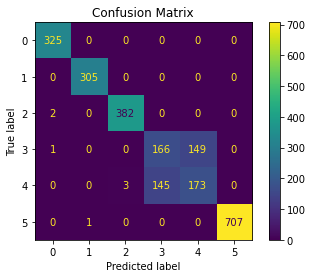

In [83]:
plot_confusion_matrix(dtClassifier, X_test, y_test);
plt.title('Confusion Matrix');